In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.drop(['cp','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis='columns',inplace=True)

In [5]:
df.head()

,age,sex,trestbps,chol,target
0,52,1,125,212,0
1,53,1,140,203,0
2,70,1,145,174,0
3,61,1,148,203,0
4,62,0,138,294,0


In [6]:
df.to_csv('heart_disease_4features.csv')

In [9]:
X= df.drop(['target'],axis='columns')
y=df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs= 1, max_depth= 5, n_estimators = 100, oob_score = True)

In [16]:
%%time
model.fit(X_train, y_train)

CPU times: user 139 ms, sys: 9.97 ms, total: 149 ms
Wall time: 153 ms


RandomForestClassifier(max_depth=5, n_jobs=1, oob_score=True, random_state=42)

In [18]:
model.oob_score_

0.7890243902439025

In [19]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [20]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [21]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [22]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 657 ms, sys: 189 ms, total: 846 ms
Wall time: 16.9 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [23]:
grid_search.best_score_


0.8341463414634146

In [24]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

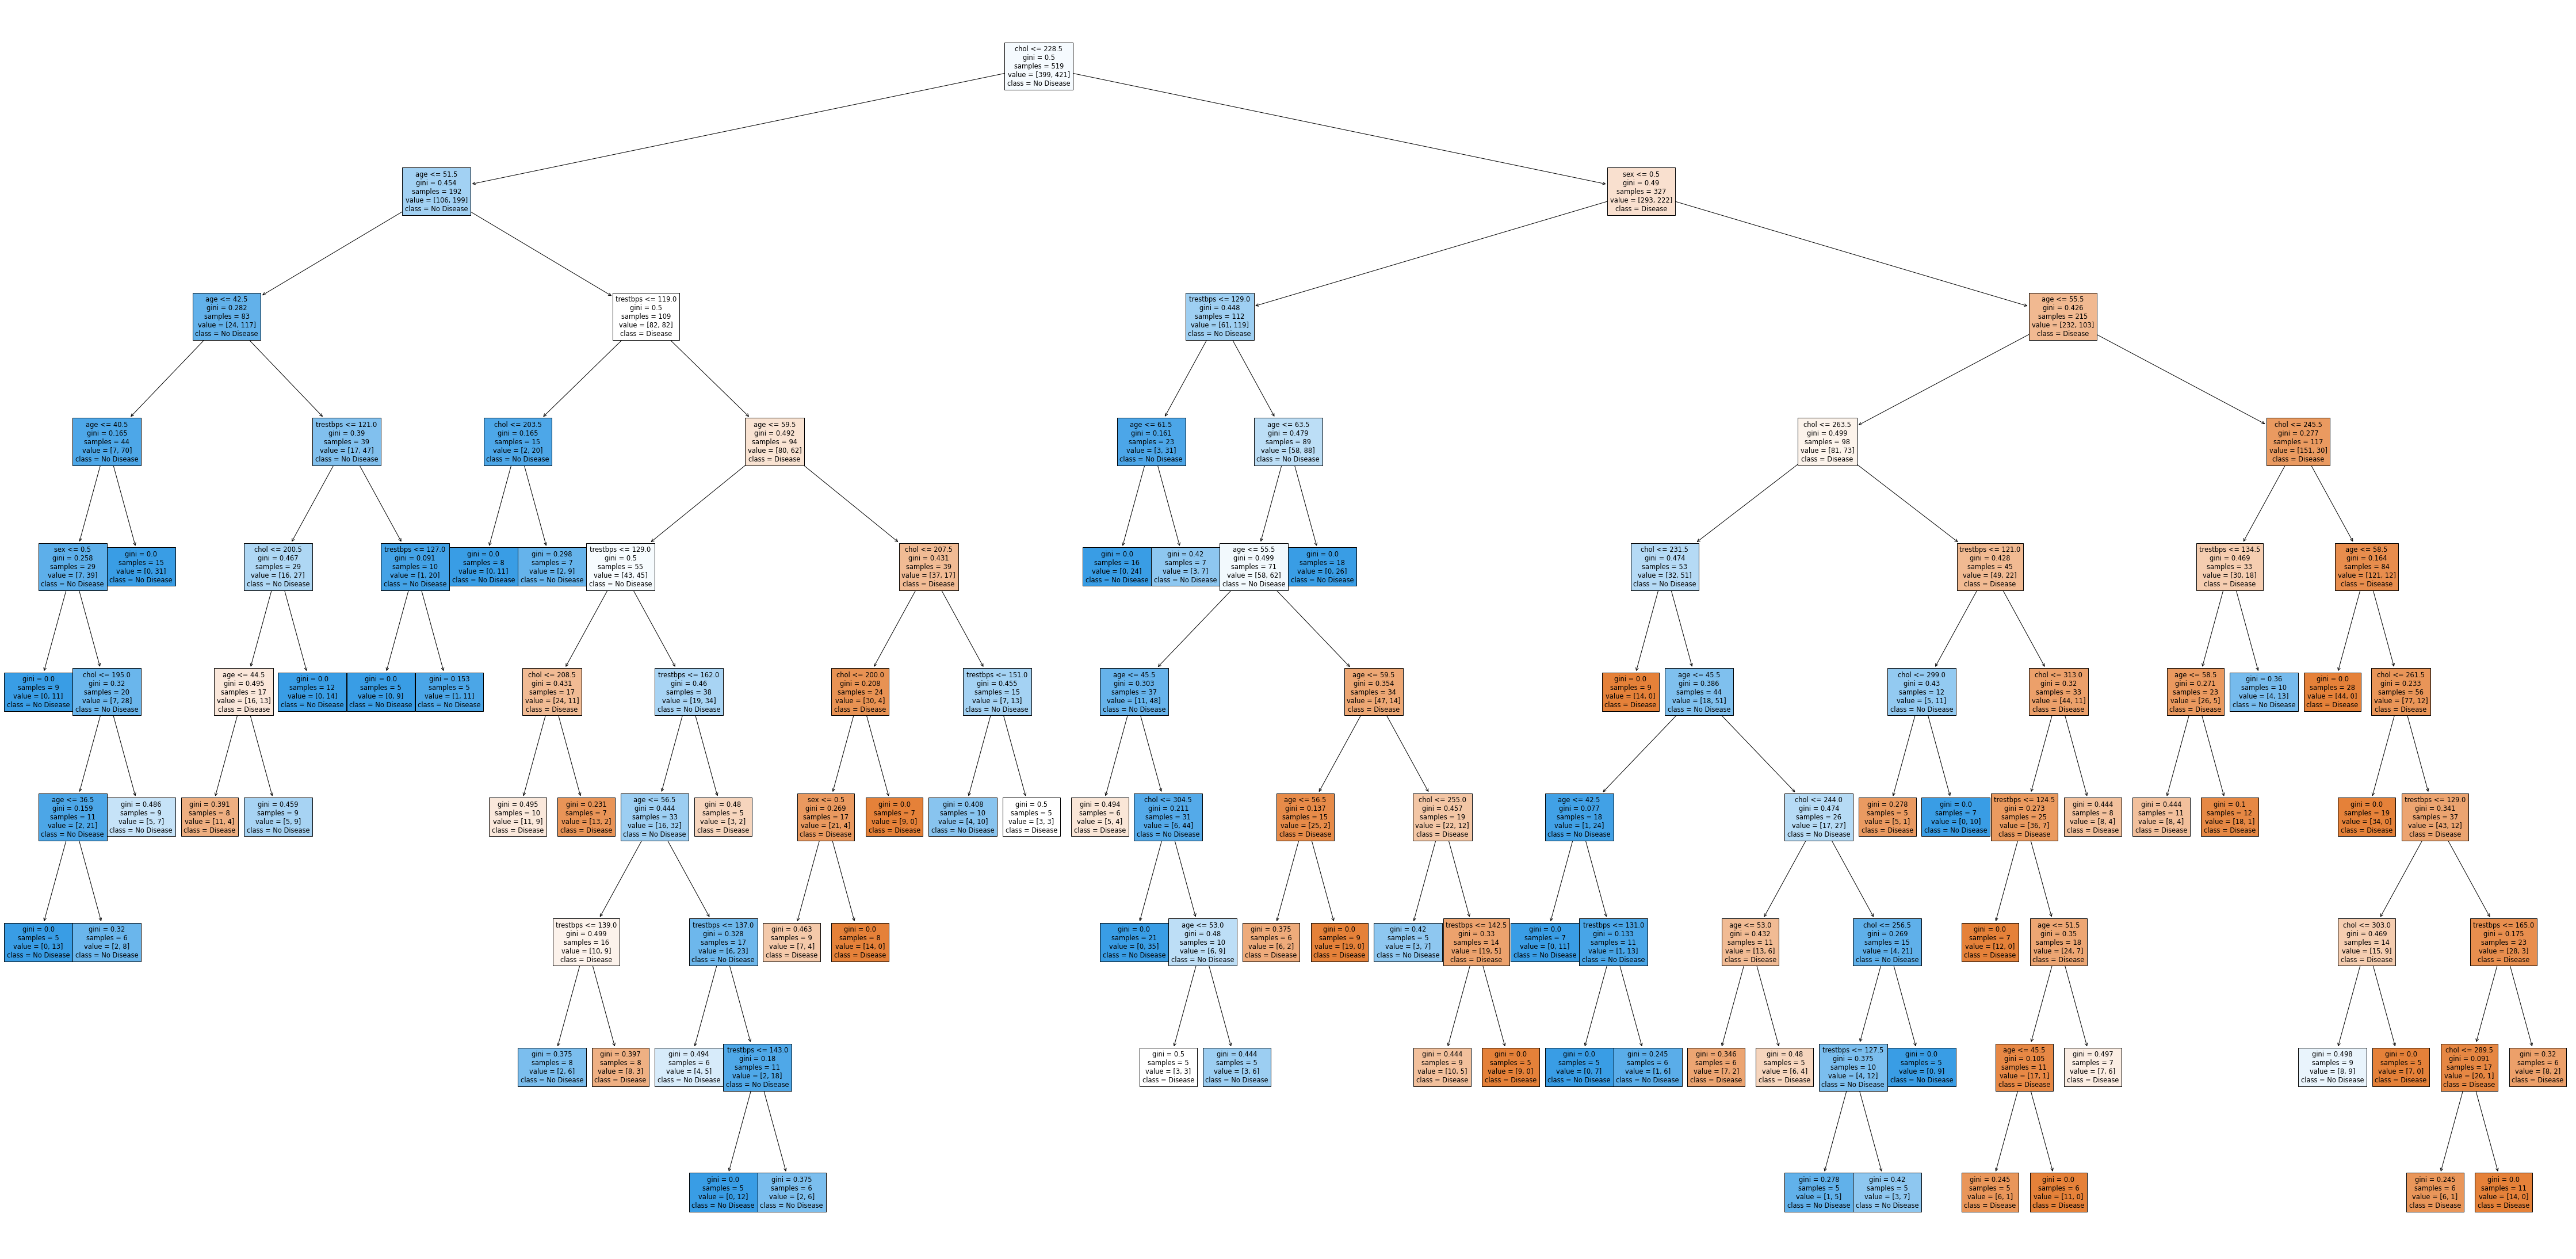

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


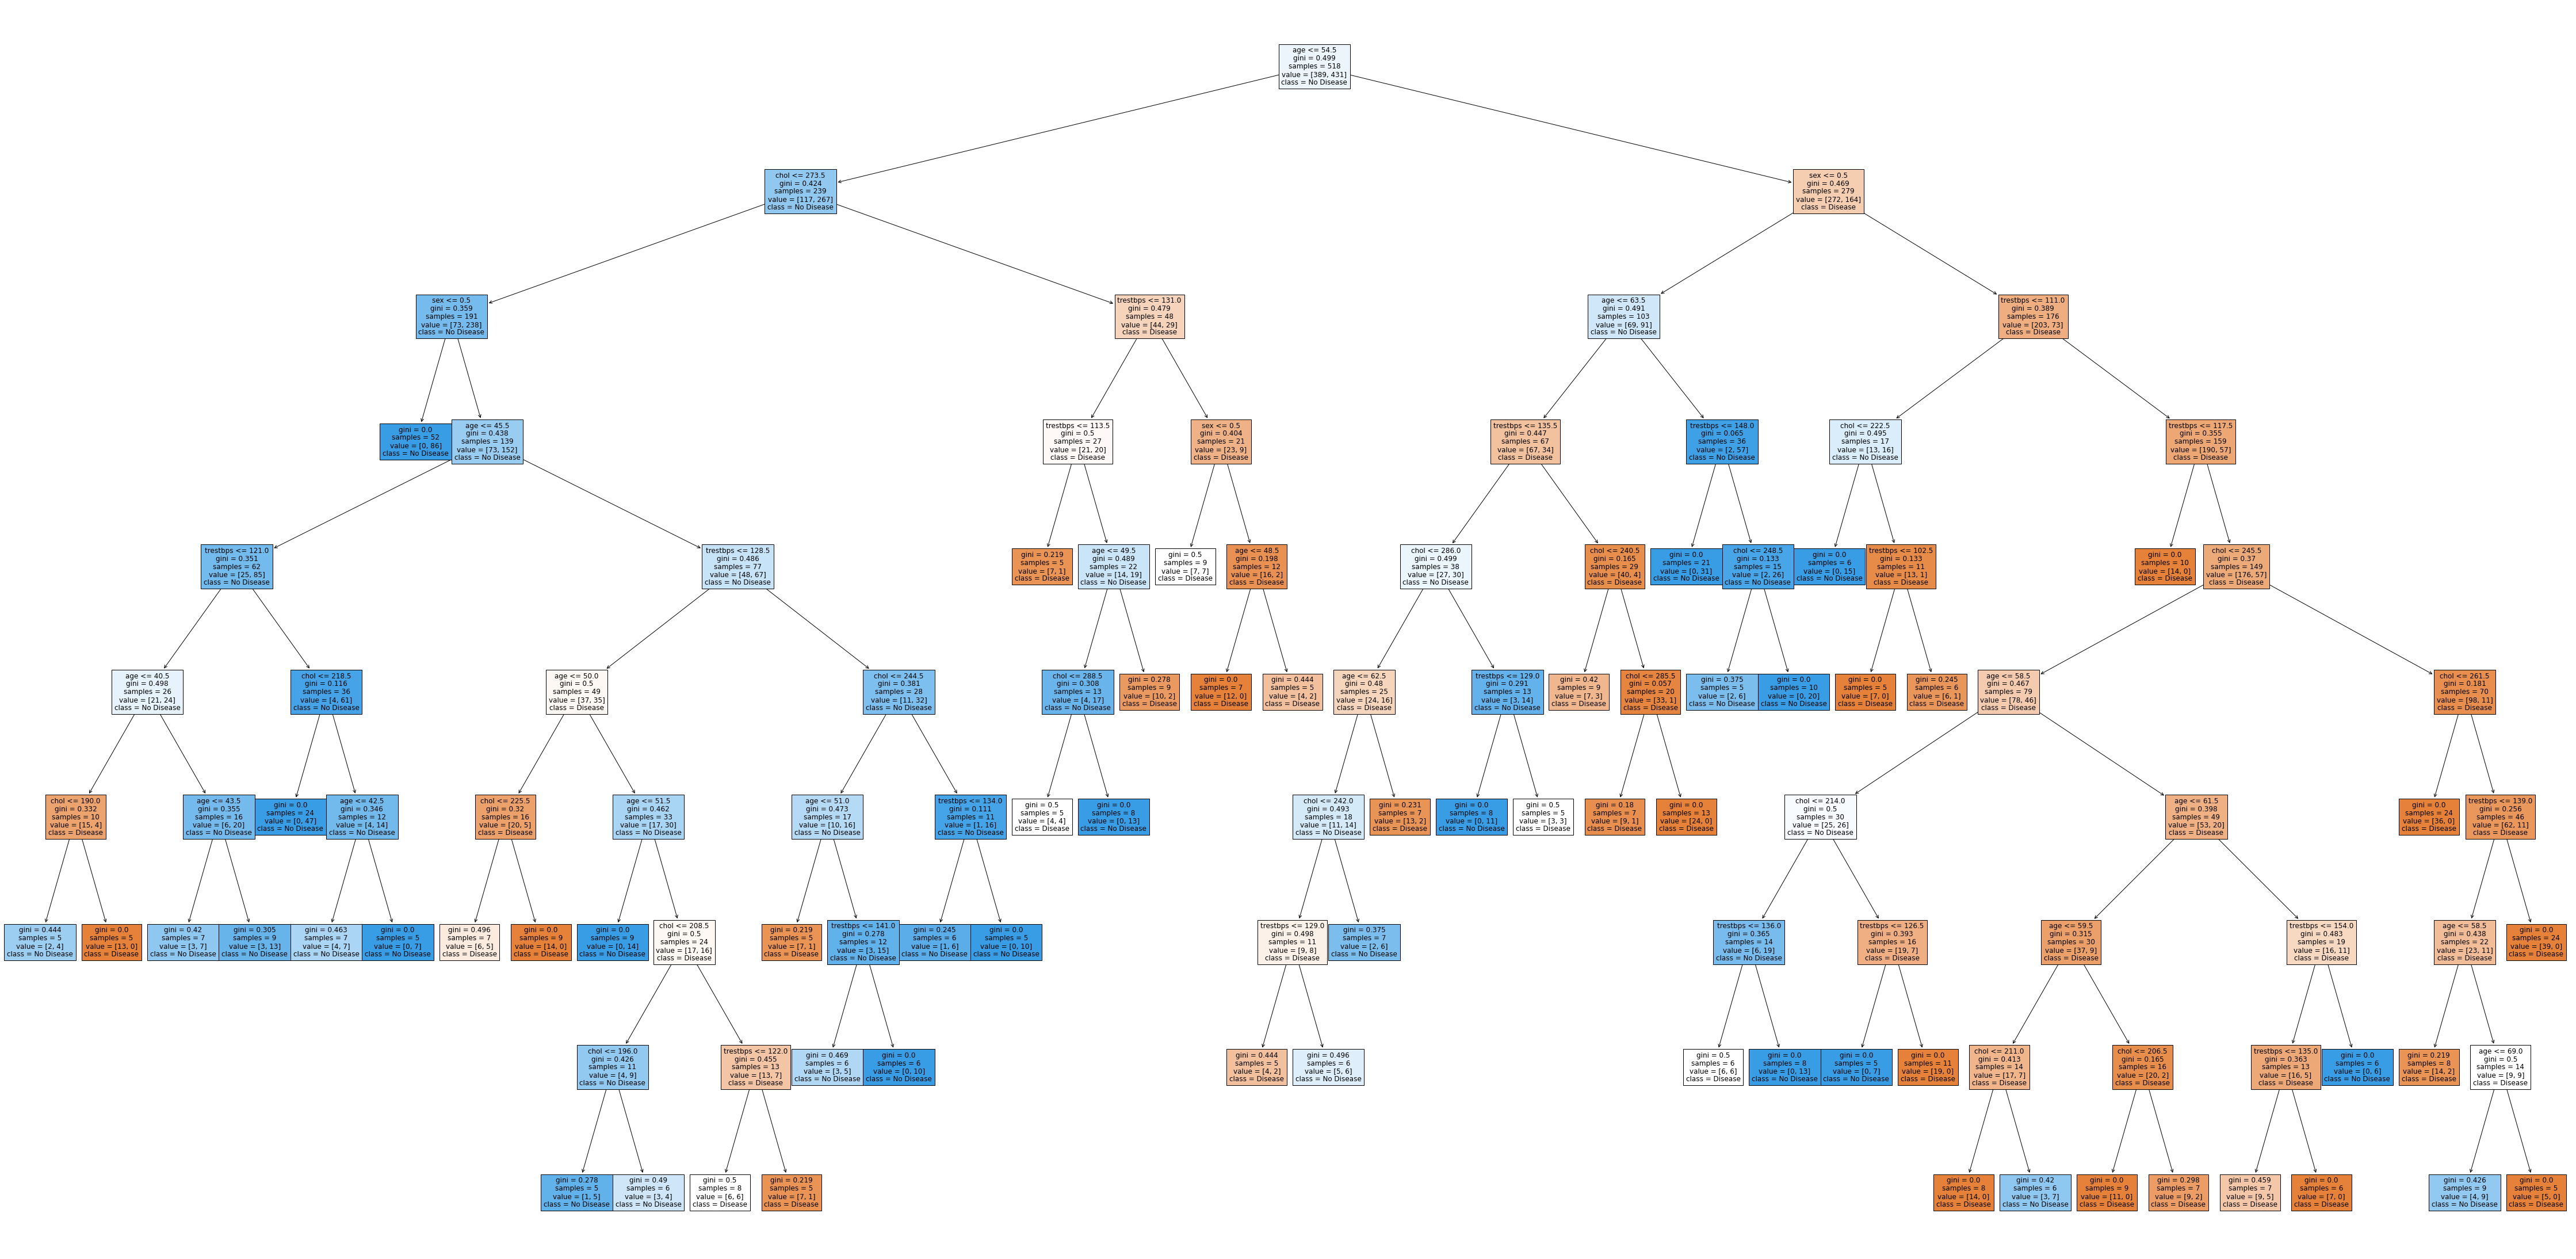

In [27]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
